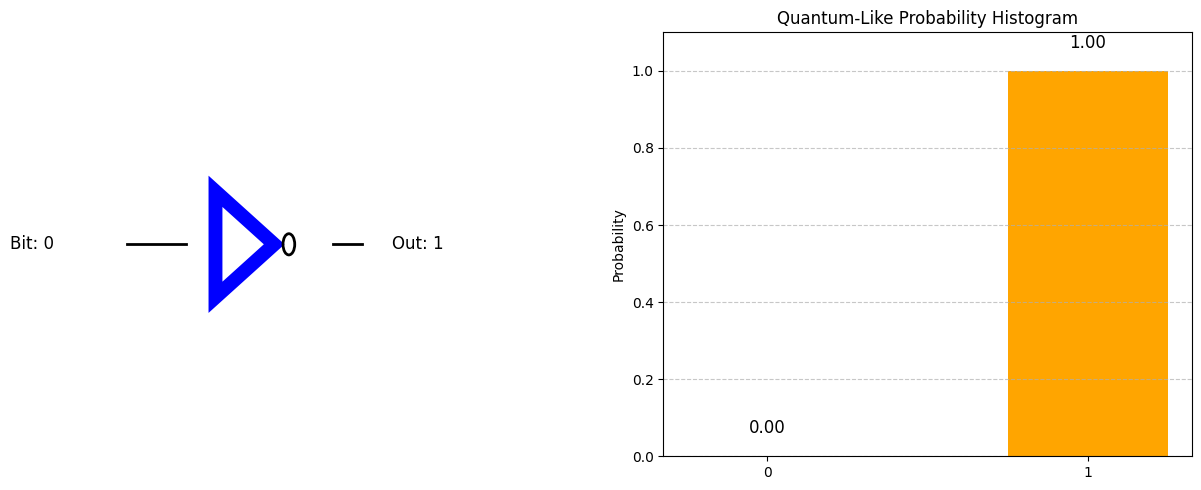

In [36]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np

# NOT Gate Function (classical)
def NOT_gate(a):
    return not a

# Function to plot NOT gates in series (schematic diagram)
def plot_NOT_gate_schematic(ax, a_val, num_gates=1):  # num_gates hardcoded to 1
    ax.clear()

    # Loop through the number of NOT gates and draw each one
    for i in range(num_gates):
        # Gate position adjustment
        x_offset = i * 3
        
        # Draw the NOT gate shape
        gate_outline = plt.Polygon([(x_offset - 0.5, -0.5), (x_offset - 0.5, 0.5), (x_offset + 0.5, 0)], closed=True, fill=None, edgecolor='blue', linewidth=10)
        ax.add_patch(gate_outline)
        
        # Draw the small circle for the NOT gate output
        ax.add_patch(plt.Circle((x_offset + 0.75, 0), 0.10, fill=None, edgecolor='black', linewidth=2))
        
        # Input and Output lines
        if i == 0:
            ax.plot([-2, x_offset - 1], [0, 0], color='black', linewidth=2)  # First input line
        else:
            ax.plot([x_offset - 1.5, x_offset - 1], [0, 0], color='black', linewidth=2)  # Internal lines between gates
            
        ax.plot([x_offset + 1.5, x_offset + 2], [0, 0], color='black', linewidth=2)  # Output line for each gate

    # Calculate the final output by applying NOT repeatedly
    output_val = a_val
    for _ in range(num_gates):
        output_val = int(NOT_gate(output_val))
    
    # Label for input
    ax.text(-4, 0, f'Bit: {a_val}', fontsize=12, verticalalignment='center')
    
    # Label for final output
    ax.text(num_gates * 3 - 0.5, 0, f'Out: {output_val}', fontsize=12, verticalalignment='center')

    # Hide axis
    ax.set_xlim(-3, num_gates * 3 + 3)
    ax.set_ylim(-2, 2)
    ax.axis('off')

# Function to plot quantum-like histograms for state 0 and state 1 probabilities
def plot_quantum_histogram(ax, a_val, num_gates=1):  # num_gates hardcoded to 1
    ax.clear()

    # Initial input state
    values = [a_val]
    for _ in range(num_gates):
        values.append(int(NOT_gate(values[-1])))

    # Probability of state |0⟩ and state |1⟩ after final stage
    final_state = values[-1]
    prob_0 = 1 if final_state == 0 else 0
    prob_1 = 1 if final_state == 1 else 0

    # Plot the probabilities
    states = ['0', '1']
    probabilities = [prob_0, prob_1]
    
    ax.bar(states, probabilities, color=['blue', 'orange'], width=0.5)

    # Set labels and title
    ax.set_ylabel('Probability')
    ax.set_title('Quantum-Like Probability Histogram')

    # Add text labels for probabilities
    for i, prob in enumerate(probabilities):
        ax.text(i, prob + 0.05, f'{prob:.2f}', ha='center', va='bottom', fontsize=12)

    # Customize axis
    ax.set_ylim(0, 1.1)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Interactive widgets for input and GO button
a = widgets.Dropdown(options=[0, 1], description='Input')
go_button = widgets.Button(description='GO')

# Function to display the result and update both plots
def update_NOT_series_side_by_side(*args):
    a_val = a.value
    n_val = 1  # Hardcoded number of NOT gates
    
    # Clear the plots and generate new ones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the NOT gate schematic and the quantum-like histogram side by side
    plot_NOT_gate_schematic(ax1, a_val, n_val)
    plot_quantum_histogram(ax2, a_val, n_val)
    
    # Show the updated plots
    plt.tight_layout()
    plt.show()

# Attach the event listener to the GO button
go_button.on_click(update_NOT_series_side_by_side)

# Display the widgets and result
display(widgets.VBox([a, go_button]))

# Initial update (optional, you can remove this if you want the plot to appear only after clicking GO)
update_NOT_series_side_by_side()


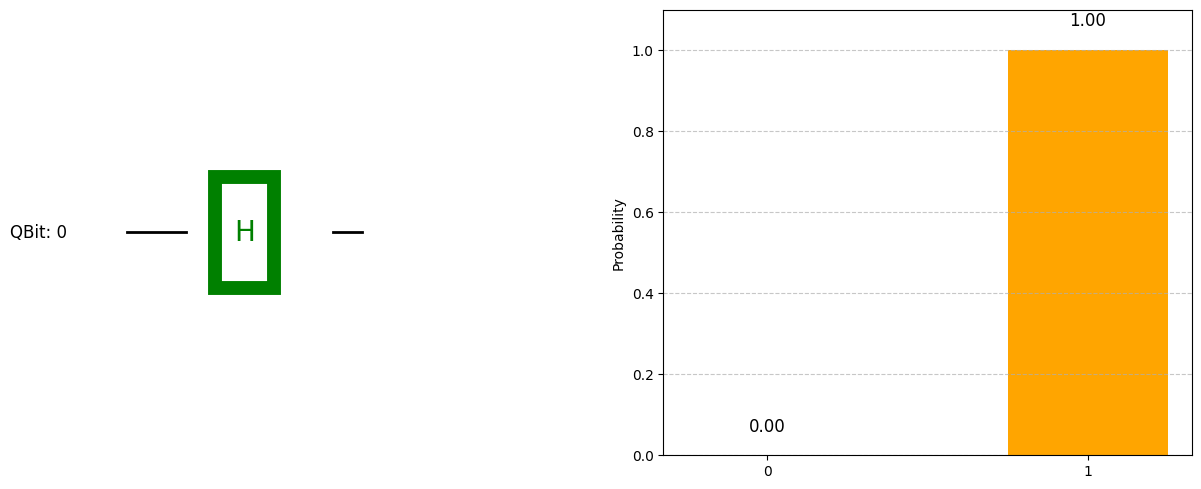

In [22]:
import qiskit
from qiskit.visualization import plot_histogram
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from qiskit_aer.primitives import Sampler


# Function to simulate a quantum circuit with Hadamard gates and shots control
def simulate_hadamard_circuit(num_gates, shots):
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = qiskit.QuantumCircuit(1, 1)

    # Apply the Hadamard gate num_gates times
    for _ in range(num_gates):
        circuit.h(0)

    # Measure the qubit
    circuit.measure(0, 0)

    # Use Qiskit's Sampler to simulate the quantum circuit
    probabs = Sampler().run(circuit, shots=shots).result().quasi_dists[0]

    prob_0 = probabs[0] if 0 in probabs else 0
    prob_1 = probabs[1] if 1 in probabs else 0

    return prob_0, prob_1, circuit

# Function to plot Hadamard gate schematic
def plot_hadamard_gate_schematic(ax, num_gates):
    ax.clear()

    # Loop through the number of Hadamard gates and draw each one
    for i in range(num_gates):
        # Gate position adjustment
        x_offset = i * 3
        
        # Draw the Hadamard gate shape (rectangle with H label)
        gate_outline = plt.Rectangle((x_offset - 0.5, -0.5), 1, 1, fill=None, edgecolor='green', linewidth=10)
        ax.add_patch(gate_outline)
        ax.text(x_offset, 0, 'H', fontsize=20, ha='center', va='center', color='green')
        
        # Input and Output lines
        if i == 0:
            ax.plot([-2, x_offset - 1], [0, 0], color='black', linewidth=2)  # First input line
        else:
            ax.plot([x_offset - 1.5, x_offset - 1], [0, 0], color='black', linewidth=2)  # Internal lines between gates
            
        ax.plot([x_offset + 1.5, x_offset + 2], [0, 0], color='black', linewidth=2)  # Output line for each gate

    # Label for input
    ax.text(-4, 0, 'QBit: 0', fontsize=12, verticalalignment='center')  # Fixed to 0
    
    # Hide axis
    ax.set_xlim(-3, num_gates * 3 + 3)
    ax.set_ylim(-2, 2)
    ax.axis('off')

# Function to plot quantum-like histograms for state 0 and state 1 probabilities
def plot_quantum_histogram(ax, num_gates, shots):
    ax.clear()

    # Simulate the Hadamard circuit using Qiskit
    prob_0, prob_1, circuit = simulate_hadamard_circuit(num_gates, shots)

    # Plot the probabilities
    states = ['0', '1']
    probabilities = [prob_0, prob_1]
    
    ax.bar(states, probabilities, color=['blue', 'orange'], width=0.5)

    # Set labels and title
    ax.set_ylabel('Probability')
    # ax.set_title(f'Hadamard Gate Series (Stages: {num_gates}, Shots: {shots})')

    # Add text labels for probabilities
    for i, prob in enumerate(probabilities):
        ax.text(i, prob + 0.05, f'{prob:.2f}', ha='center', va='bottom', fontsize=12)

    # Customize axis
    ax.set_ylim(0, 1.1)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Function to update histogram and gate schematic when the button is clicked
def on_go_button_click(b):
    shots_val = shots.value
    if shots_val !=1:
        shots_val=shots_val*1024
    num_gates = 1  # Fixed number of gates
    
    # Clear the plot and generate new ones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the Hadamard gate schematic
    plot_hadamard_gate_schematic(ax1, num_gates)

    # Plot the quantum-like histogram
    plot_quantum_histogram(ax2, num_gates, shots_val)
    
    # Show the updated plot
    plt.tight_layout()
    plt.show()

# Interactive widget for number of shots (restricted to 1-4)
shots = widgets.IntSlider(value=1, description='Check Qbit', min=1, max=4)  # Slider for shots
# Create a "Go" button
go_button = widgets.Button(description="Go")

# Attach event listener to the button
go_button.on_click(on_go_button_click)

# Display the widget for shots and the button
display(widgets.VBox([shots, go_button]))

# Initial plot setup
on_go_button_click(go_button)  # Show initial plots


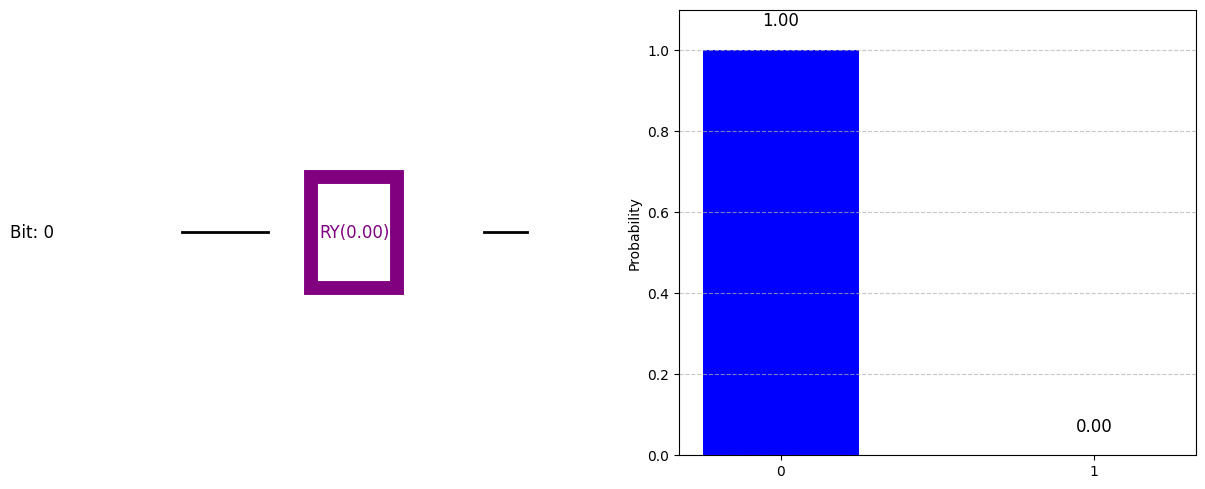

In [26]:
import qiskit
from qiskit.visualization import plot_histogram
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
from qiskit_aer.primitives import Sampler
import numpy as np

# Function to simulate a quantum circuit with only the RY(theta) gate and shots control
def simulate_ry_circuit(shots, theta):
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = qiskit.QuantumCircuit(1, 1)

    # Apply the RY gate with angle theta
    circuit.ry(theta, 0)

    # Measure the qubit
    circuit.measure(0, 0)

    # Use Qiskit's Sampler to simulate the quantum circuit
    probabs = Sampler().run(circuit, shots=shots).result().quasi_dists[0]

    prob_0 = probabs[0] if 0 in probabs else 0
    prob_1 = probabs[1] if 1 in probabs else 0

    return prob_0, prob_1, circuit

# Function to plot the RY gate schematic
def plot_ry_gate_schematic(ax, theta):
    ax.clear()

    # Draw the RY gate shape (rectangle with RY label)
    ry_offset = 0
    ry_gate_outline = plt.Rectangle((ry_offset - 0.5, -0.5), 1, 1, fill=None, edgecolor='purple', linewidth=10)
    ax.add_patch(ry_gate_outline)
    ax.text(ry_offset, 0, f'RY({theta:.2f})', fontsize=12, ha='center', va='center', color='purple')

    # Input and Output lines for the RY gate
    ax.plot([-2, ry_offset - 1], [0, 0], color='black', linewidth=2)  # Input line
    ax.plot([ry_offset + 1.5, ry_offset + 2], [0, 0], color='black', linewidth=2)  # Output line for the RY gate

    # Label for input
    ax.text(-4, 0, 'Bit: 0', fontsize=12, verticalalignment='center')  # Fixed to 0
    
    # Hide axis
    ax.set_xlim(-3, 3)
    ax.set_ylim(-2, 2)
    ax.axis('off')

# Function to plot quantum-like histograms for state 0 and state 1 probabilities
def plot_quantum_histogram(ax, shots, theta):
    ax.clear()

    # Simulate the RY circuit using Qiskit
    prob_0, prob_1, circuit = simulate_ry_circuit(shots, theta)

    # Plot the probabilities
    states = ['0', '1']
    probabilities = [prob_0, prob_1]
    
    ax.bar(states, probabilities, color=['blue', 'orange'], width=0.5)

    # Set labels and title
    ax.set_ylabel('Probability')
    # ax.set_title(f'RY Circuit (Shots: {shots}, Theta: {theta:.2f})')

    # Add text labels for probabilities
    for i, prob in enumerate(probabilities):
        ax.text(i, prob + 0.05, f'{prob:.2f}', ha='center', va='bottom', fontsize=12)

    # Customize axis
    ax.set_ylim(0, 1.1)
    ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Function to update histogram and gate schematic when the button is clicked
def on_go_button_click(b):
    shots_val = shots.value
    theta_val = theta_slider.value
    
    # Clear the plot and generate new ones
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot the RY gate schematic
    plot_ry_gate_schematic(ax1, theta_val)

    # Plot the quantum-like histogram
    plot_quantum_histogram(ax2, shots_val, theta_val)
    
    # Show the updated plot
    plt.tight_layout()
    plt.show()

# Interactive widget for number of shots (restricted to 1-4)
shots = widgets.IntSlider(value=1, description='Check Qbit', min=1, max=4)  # Slider for shots

# Slider for theta angle in the RY gate
theta_slider = widgets.FloatSlider(value=0, min=0, max=np.pi, step=0.1, description=r'$\theta$ (rad)')

# Create a "Go" button
go_button = widgets.Button(description="Go")

# Attach event listener to the button
go_button.on_click(on_go_button_click)

# Display the widgets for shots, theta, and the Go button
display(widgets.VBox([shots, theta_slider, go_button]))

# Initial plot setup
on_go_button_click(go_button)  # Show initial plots
